# Final Project Submission

* Student name: Shayan Abdul Karim Khan
* Student pace: Self Paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni

## Problem Overview

Each year more than 42,000 people are needlessly killed on American streets and thousands more are injured. We call this suffering traffic “accidents” — but, in reality, we have the power to prevent traffic collisions. To counter these fatalities and injuries, the Department of Transportations (DOTs) across the US are working towards a new vision for safety called "Vision Zero". 

Vision Zero recognizes that people will sometimes make mistakes, so the road system and related policies should be designed to ensure those inevitable mistakes do not result in severe injuries or fatalities. This means that system designers and policymakers are expected to improve the roadway environment, policies (such as speed management), and other related systems to lessen the severity of crashes by working with stakeholders ranging from auto manufacturers to policy makers.

Similarly, the Chicago DOT wants to conduct a study to understand the underlying patterns for car accidents. The ask is to use the data available to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. 

## Business Questions

In its work towards Vision Zero, the Chicago DOT has the following questions:

1. What are the common variables between the different classes of traffic accidents?
<br>

2. Is there a discernable pattern to the accidents?


### Resolution Approach

To help inform appropriate measures towards the movement to Vision Zero, aa classifier for predictions. The data will be assessed for recommendations on 4 different fronts:
<br>

1. Type of Vehicle: For example; Passenger Vehilce, Commercial Vehicle, etc.
<br>

2. Nature Effects: For example; Rainy, Snow, Windy, etc.
<br>

3. Infrasturcture Effects: For example, specific locaations, faulty equipment or bad road conditions.
<br>

4. Type of accidents: This is important to understand the cause behind it. For eexample; a DUI accident would have drastically different preventative measures as compared to a sober over-speeding accident
<br>

For prioritization purposes, it will also bee critical to understand what accidents resullted in fatalities or injuries and which didn't.

## Data Sources

The data being used is from the Chicago Polic Department (CPD) and is provided oninee by the City of Chicago. The data is from 2015 to the present day. It is updated daily but the data being used as a part of this project is recent until 3rd February 2023. 

There are 3 datasets being used for analysis:

1. Traffic crashes data summary: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifv 
<br>

2. Vehicles information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3 
<br>

3. People information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d 

Considering that this is the official dataset of the City of Chicago regarding traffic crashes, it can be easilly concluded that it would be the most reliable dataset available. Using this dataset will also increase the confidence of the client on the results and recommendations of this project. 

## Data Understanding

This section will be exploratory to understand the different features of the data. All three datasets will be explored separately. Using the source documentation, data and the features will be interpreted and determinations will made about which features are relevant to target. Towards the end of exploring the data, avenues of analysis that can be used will also become clearer. As data is explored, any anomalies or issues require further cleaniing/processing will be identified and handled in the `Data Preparation` section.

To start things off, lets import all the libraries and functions that will be used in this notebook.

In [2]:
import pandas as pd #imports the pandas library as pd to work on databases
from sodapy import Socrata # for API integration
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
from datetime import datetime # for datetime manipulation
import matplotlib.pyplot as plt # importing matplotlib for visualizations 
%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn
from collections import Counter #import Counter
import statsmodels.api as sm #import stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import scikit library functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV


#import scipy libraries
from scipy import stats as stats

#import plotly
import plotly.express as px
import plotly.graph_objects as go

### Traffic Crashes - Crashes

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Crashes`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if.

Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

As per Illinois statute, only crashes with a property damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes. However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [3]:
#import the dataset using the API endpoint
crashes_df = pd.read_csv('data/Traffic_Crashes-Crashes.csv')

#preview thee first 5 rows
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [4]:
#Explore the info for all the features
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                692784 non-null  object 
 1   RD_NO                          688672 non-null  object 
 2   CRASH_DATE_EST_I               52531 non-null   object 
 3   CRASH_DATE                     692784 non-null  object 
 4   POSTED_SPEED_LIMIT             692784 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         692784 non-null  object 
 6   DEVICE_CONDITION               692784 non-null  object 
 7   WEATHER_CONDITION              692784 non-null  object 
 8   LIGHTING_CONDITION             692784 non-null  object 
 9   FIRST_CRASH_TYPE               692784 non-null  object 
 10  TRAFFICWAY_TYPE                692784 non-null  object 
 11  LANE_CNT                       198997 non-null  float64
 12  ALIGNMENT                     

There are a number of columns with missing values but they can also simply be categorical columns that don't apply to all records. The documentation on the columns available on https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if can be used to explore the columns separately. The descriptions have also been listed below.

1. `CRASH_RECORD_ID`: This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. This will be important for joining the databases.
<br>

2. `RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes.
This column can be ignored since this does not give us any insight into the causes of crashes. **DROP COLUMN**
<br>

3. `CRASH_DATE_EST_I`: Crash date estimated by desk officer or reporting party (only used in cases where crash is reported at police station days after the crash). This column can be ignored since there are missing values here. There is another column for Crash Dates but has no missing values. **DROP COLUMN**
<br>

4. `CRASH_DATE`: Date and time of crash as entered by the reporting officer. This gives us insight into if there are periods where there are more crashes than others. If there is a discernable pattern, appropriate preventative measures can be taken. The time and date will have to be separated out for individual analysis. Also the initial description of thee dataset mentions that 2018 onwards citywide E-craash daat aiss available. Therefore, the data will be filtered out accordingly. Also, the daata has to be changed to datetime versions for proper use.
<br>

5. `POSTED_SPEED_LIMIT`: Posted speed limit, as determined by reporting officer. This is the speed limit for the area where the crash happened. This coupled with the speed that the car was travelling at can help inform if the crash was at high speeds. Consequently, this can be a critical contirbutor in determining the cause of the crash.
<br>

6. `TRAFFIC_CONTROL_DEVICE`: Traffic control device present at crash location, as determined by reporting officer. It would be important to understand the contents of this column before making a decision on its use. 

In [5]:
#check unique values
crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 397249
TRAFFIC SIGNAL              192000
STOP SIGN/FLASHER            68792
UNKNOWN                      24545
OTHER                         4515
LANE USE MARKING              1226
YIELD                          977
OTHER REG. SIGN                721
OTHER WARNING SIGN             591
RAILROAD CROSSING GATE         448
PEDESTRIAN CROSSING SIGN       384
DELINEATORS                    271
SCHOOL ZONE                    263
FLASHING CONTROL SIGNAL        248
POLICE/FLAGMAN                 243
OTHER RAILROAD CROSSING        159
RR CROSSING SIGN                93
NO PASSING                      40
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

There are multiple categories but the `NO CONTROLS` category stands out with almost 50% share in the data for this column. The other categorieswould be location dependent signage. This data can be used to determine whether `NO CCONTROLS` plays a significantlt higher part in certain types of crashes. The data in this column can be grouped together to only two categories, `NO CONTROLS` and `CONTROLS`.

7. `DEVICE_CONDITION`: Condition of traffic control device, as determined by reporting officer. This would be an important aspect to consider. Lets explore the contents of this column.

In [6]:
#check unique values
crashes_df['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 401903
FUNCTIONING PROPERLY        238515
UNKNOWN                      41164
OTHER                         5347
FUNCTIONING IMPROPERLY        3373
NOT FUNCTIONING               2143
WORN REFLECTIVE MATERIAL       258
MISSING                         81
Name: DEVICE_CONDITION, dtype: int64

Considering that this column also has a demarcated category of `NO CONTROLS` with categories highlighting whther there were any issues with the traffic control devices present, it would be more useful to use this column rather than using the `TRAFFIC_CONTROL_DEVICE` column. It is also clear that having no controls is the biggest contributor to traffic crashes but what kind of impact they have is something that has to be explored.

Therefore, **DROP `TRAFFIC_CONTROL_DEVICE` COLUMN**

`WEATHER_CONDITION`: Weather condition at time of crash, as determined by reporting officer. This will definitely be a big factor in predicting the cause of crashes as well since the weather can play a big part in traffic accidents. Lets take a look at the contents of the column.

In [7]:
#check unique values
crashes_df['WEATHER_CONDITION'].value_counts()

CLEAR                       546474
RAIN                         59674
UNKNOWN                      34543
SNOW                         25734
CLOUDY/OVERCAST              20505
OTHER                         2204
FREEZING RAIN/DRIZZLE         1229
FOG/SMOKE/HAZE                1031
SLEET/HAIL                     881
BLOWING SNOW                   367
SEVERE CROSS WIND GATE         138
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

The unkown data has to be dealt with in the **Data Preparation** section but all other data will be valuable to carry forward. It seems like the most car crashes take place in the clear weather while the worse the weather is the fewer car crashes there are. This might be becausee people naturally are more carefull during bad weather. Nonetheless this has to be inveestigated more to see whether inclement weather accidents are more serious or impact specific types of vehicles. It can also be that there are less vehicles on the road during inclement weather therefore while the numbers might be low, the ratio of cars on the road and number of accidents might be high.

`LIGHTING_CONDITION`: Light condition at time of crash, as determined by reporting office. This is also another big factor. Theoretically, bad lighting conditions can play a big part in car crashes. This column can prove to be critial. Lets invvestigate it to understand the contents.

In [8]:
#check unique values
crashes_df['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  445517
DARKNESS, LIGHTED ROAD    153269
DARKNESS                   33364
UNKNOWN                    28678
DUSK                       20317
DAWN                       11639
Name: LIGHTING_CONDITION, dtype: int64

In [9]:
crashes_df['LIGHTING_CONDITION'].value_counts(normalize=True)

DAYLIGHT                  0.643082
DARKNESS, LIGHTED ROAD    0.221236
DARKNESS                  0.048159
UNKNOWN                   0.041395
DUSK                      0.029327
DAWN                      0.016800
Name: LIGHTING_CONDITION, dtype: float64

Similar to the weather conditions data, it looks like the best lighting condition has the most accidents. This can be either be because peoplee are generally more careful when there's less light or that there are fewer cars on the road therefore fewer accidents. Regardless, considering that almost 91% of crashes occured in either Daylight, Lighted roads, or unknown, means that this data will not be able to help us greatlly distinguish patterns in the causes of the crashes.

**DROP LIGHTING_CONDITION COLUMN**

`ROAD_DEFECT`: Road defects, as determined by reporting officer. This might be important. Lets take a look at the data first.

In [10]:
#check unique values
crashes_df['ROAD_DEFECT'].value_counts()

NO DEFECTS           565943
UNKNOWN              112665
RUT, HOLES             5561
OTHER                  3858
WORN SURFACE           2859
SHOULDER DEFECT        1350
DEBRIS ON ROADWAY       548
Name: ROAD_DEFECT, dtype: int64

In [11]:
#check the ratios
crashes_df['ROAD_DEFECT'].value_counts(normalize=True)

NO DEFECTS           0.816911
UNKNOWN              0.162626
RUT, HOLES           0.008027
OTHER                0.005569
WORN SURFACE         0.004127
SHOULDER DEFECT      0.001949
DEBRIS ON ROADWAY    0.000791
Name: ROAD_DEFECT, dtype: float64

Almost 97% of the crashes occured in NO DEFECTS or UNKOWN zones which means that this data will not help in any significant way. 

**DROP ROAD_DEFECT COLUMN**

`REPORT_TYPE`: Administrative report type (at scene, at desk, amended). This column can be ignored for the purposes of this analysis.

**DROP REPORT_TYPE COLUMN**

`CRASH_TYPE`: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away. This data will be used to filter on crashes that had injuries or fatalities. While the eventual goal is to have no crashes, the goal of this analysis is to support work towards Vision Zero which focuses on fatalities and injuries. Lets investigate the contents if this column before movving on.

In [12]:
#check unique values
crashes_df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

With only 18,000 records, out data size will be significantly reduced but helps us focus on the main problem.

`INTERSECTION_RELATED_I`: A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection. 
Lets investigate the contents of this column.

In [13]:
#check unique values
crashes_df['INTERSECTION_RELATED_I'].value_counts()

Y    151396
N      7401
Name: INTERSECTION_RELATED_I, dtype: int64

This column has several missing values that we can't replace and dropping those records would be detrimeental to the dataset. Therefore this column can be ignored.

**DROP INTERSECTION_RELATED_I COLUMN**

`NOT_RIGHT_OF_WAY_I`: Whether the crash begun or first contact was made outside of the public right-of-way. This column also has almost 50% of its values missing. Also, this gives us insight into the circumstances around a crash but not significant insight into the cause of a crash. 

**DROP NOT_RIGHT_OF_WAY_I COLUMN**

`HIT_AND_RUN_I`: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid. This gives us inight into the aftermaths of the crash but no significant insight into the cause of it.

**DROP HIT_AND_RUN_I COLUMN**

`DAMAGE`: A field observation of estimated damage. Similar to the previous two, this doesn't provide insight into the causes of the crash. 

**DROP DAMAGE COLUMN**

`DATE_POLICE_NOTIFIED`: Calendar date on which police were notified of the crash. Similarly, this doesn't provide any insight into the causes of the crash.

**DROP DATE_POLICE_NOTIFIED COLUMN**

`PRIM_CONTRIBUTORY_CAUSE`: The factor which was most significant in causing the crash, as determined by officer judgment. This will be the target column that will be used. Lets investigate the contents of this column.

In [14]:
#check unique values
crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 266260
FAILING TO YIELD RIGHT-OF-WAY                                                        75716
FOLLOWING TOO CLOSELY                                                                69035
NOT APPLICABLE                                                                       36421
IMPROPER OVERTAKING/PASSING                                                          33504
FAILING TO REDUCE SPEED TO AVOID CRASH                                               29613
IMPROPER BACKING                                                                     28228
IMPROPER LANE USAGE                                                                  25526
IMPROPER TURNING/NO SIGNAL                                                           22879
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22419
DISREGARDING TRAFFIC SIGNALS                                                         13383

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`SEC_CONTRIBUTORY_CAUSE`: The factor which was second most significant in causing the crash, as determined by officer judgment. Similar to the previous one, this will be an important column in analysis.

In [15]:
#check unique values
crashes_df['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      282372
UNABLE TO DETERMINE                                                                 251338
FAILING TO REDUCE SPEED TO AVOID CRASH                                               26909
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  21221
FAILING TO YIELD RIGHT-OF-WAY                                                        21098
FOLLOWING TOO CLOSELY                                                                18283
IMPROPER OVERTAKING/PASSING                                                          10318
IMPROPER LANE USAGE                                                                   9863
WEATHER                                                                               8260
IMPROPER TURNING/NO SIGNAL                                                            6921
IMPROPER BACKING                                                                      5666

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`STREET_NO`: Street address number of crash location, as determined by reporting officer. While this is a valuable data point, there are latitude and longtitude data points which can proove to be more useful.

**DROP STREET_NO COLUMN**

Similarly, `STREET_DIRECTION`, `STREET_NAME`, and `BEAT_OF_OCCURRENCE` can be **DROPPED**.

Also `PHOTOS_TAKEN_I` and `STATEMENTS_TAKEN_I` are relevant to the police investigation records but not for the purposes of this notebook's analysis. Therefore they can be **DROPPED**

`WORK_ZONE_I`, `WORK_ZONE_TYPE`, and `WORKERS_PRESENT_I` are important columns to caarry forward. Usually these aree critical areas where speed limits are significantly reduced and there is a lot of worker traffic during shift hours. These can be very sensitive areas that can be significant towards attaining Vision Zero therefore it will be interesting to see their contribution towards crashes. 

Nonetheless we can drop the `WORK_ZONE_TYPE` column since the granularity of the analysis isn't specifically based on work zone type crashes. If aa significant correlation is found, then this area can be further investigated in future analysis.

`NUM_UNITS` will be an important data point since it gives information on the number of units involved in the crash.

Similarly, aligning with the Vision Zero goal, `INJURIES_TOTAL` and `INJURIES_FATAL` would be valuable columns to use in analysis. The other Injuries columns can be **DROPPED**.

`CRASH_HOUR`, `CRASH_DAY_OF_WEEK`, and `CRASH_MONTH` can be used instead of the timesatamp in column `CRASH_DATE` since these are broken down values. Nonetheless, what would be valuable from the timestamp column is the year of the crash. It might be possible that the year can play a big part in recognizing patterns of the accidents.

`LATITUDE` and `LONGITUDE` will be used for location data for crashes. This will helo determine if there are specific areas that more volatile to crashes as compared to others.

**SUMMARY**

The following columns will be carried forward:

1. CRASH_RECORD_ID
2. CRASH_DATE
3. POSTED_SPEED_LIMIT
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. CRASH_TYPE
7. PRIM_CONTRIBUTORY_CAUSE
8. SEC_CONTRIBUTORY_CAUSE
9. WORK_ZONE_I
10. WORKERS_PRESENT_I
11. INJURIES_TOTAL
12. INJURIES_FATAL
13. CRASH_HOUR
14. CRASH_DAY_OF_WEEK
15. CRASH_MONTH
16. LATITUDE
17. LONGITUDE

### Traffic Crashes - Vechiles

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Vehicles`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3.

This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units. However, people inside a vehicle including the driver do not have a trajectory separate from the vehicle in which they are travelling and hence only the vehicle they are travelling in get any entry here. This type of identification of “units” is needed to determine how each movement affected the crash. Data for occupants who do not make up an independent unit, typically drivers and passengers, are available in the People table. Many of the fields are coded to denote the type and location of damage on the vehicle. Vehicle information can be linked back to Crash data using the “CRASH_RECORD_ID” field. Since this dataset is a combination of vehicles, pedestrians, and pedal cyclists not all columns are applicable to each record.

In [16]:
#import the dataset using the API endpoint
vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')

#preview thee first 5 rows
vehicles_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_11825/3771688054.py:2: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Explore the info for all the features
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1416095 non-null  int64  
 1   CRASH_RECORD_ID           1416095 non-null  object 
 2   RD_NO                     1408273 non-null  object 
 3   CRASH_DATE                1416095 non-null  object 
 4   UNIT_NO                   1416095 non-null  int64  
 5   UNIT_TYPE                 1414134 non-null  object 
 6   NUM_PASSENGERS            209579 non-null   float64
 7   VEHICLE_ID                1384025 non-null  float64
 8   CMRC_VEH_I                26451 non-null    object 
 9   MAKE                      1384020 non-null  object 
 10  MODEL                     1383876 non-null  object 
 11  LIC_PLATE_STATE           1258222 non-null  object 
 12  VEHICLE_YEAR              1159243 non-null  float64
 13  VEHICLE_DEFECT            1

`CRASH_UNIT_ID`, `RD_NO`, `UNIT_NO`, `VEHICLE_ID`, and `CMRC_VEH_I`,  are unique IDs for crash reports which can be ignored for the purposes of the analysis. These columns will be **DROPPED**

`MAKE`, `MODEL`, `LIC_PLATE_STATE`, `VEHICLE_YEAR`, and `TRAVEL_DIRECTION` are speciific informations relevant to the vehicle. These are valuable information to keep track but these don;t provide valuable insights into causes for crashes. While the argument can be made that the make or vehicle year of a car can showcase which brands of cars and which years are involved in the most crashes, these singular data points can inform biased policies. For instance, older cars are usually owned by people who can't afford the expensive new models. Moreover, the more important aspect to know would be what kind of safety features did these cars have to understand how helpful ccertain safety features have but that data is not availabl. Therefore, these columns will be **DROPPED**.

`VEHICLE_DEFECT`: This column might contain some intersting data. Lets investigate the contents of this column.

In [18]:
#check unique values
vehicles_df['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

while thiss information is useful, 98% of the data is skewed towards None, Unkown or Other values that don't provide us any valuable insights. We can use oversampling methodlogies to help balance out the data to provide valuable insights.

`VEHICLE_TYPE`: The type of vehicle, if relevant. Lets investigate the contents of this column.

In [19]:
#check unique values
vehicles_df['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

This data will be very valuable to discern how different types of vehicles get into accidents and understand the trends in causes. The imbalance in the data has to be aaddresssed later in th eDaata Preparations Section.

`VEHICLE_USE`: The normal use of the vehicle, if relevant. In conjunction with previous column, this column can be used to createe grouped categories of vehicles such as Personal, Rideshare, etc. We can also see that there are more unknown records in this collumn than the previous one. We can use the previous column to reduce the number of unkowns n our data. 

In [20]:
#check unique values
vehicles_df['VEHICLE_USE'].value_counts()

PERSONAL                        894350
UNKNOWN/NA                      279642
NOT IN USE                       71810
OTHER                            43301
TAXI/FOR HIRE                    18505
COMMERCIAL - SINGLE UNIT         17164
RIDESHARE SERVICE                11623
CTA                               9315
POLICE                            9055
CONSTRUCTION/MAINTENANCE          6300
COMMERCIAL - MULTI-UNIT           5689
OTHER TRANSIT                     3964
SCHOOL BUS                        3724
TOW TRUCK                         2657
AMBULANCE                         1638
FIRE                              1357
STATE OWNED                       1162
DRIVER EDUCATION                  1107
MASS TRANSIT                       832
LAWN CARE/LANDSCAPING              526
AGRICULTURE                        143
CAMPER/RV - SINGLE UNIT             68
MILITARY                            55
HOUSE TRAILER                       22
CAMPER/RV - TOWED/MULTI-UNIT        16
Name: VEHICLE_USE, dtype:

`MANEUVER`: The action the unit was taking prior to the crash, as determined by the reporting officer. This will be important too understand what kind of maneuvers can cause the most crashes. These will also go hand in hand with location data to understand if certain areas have accidents occuring at specific manevers. Lets investigate this column to understand the values in it.

In [21]:
#check unique values
vehicles_df['MANEUVER'].value_counts()

STRAIGHT AHEAD                        630603
PARKED                                190912
UNKNOWN/NA                            108064
SLOW/STOP IN TRAFFIC                  105648
TURNING LEFT                           81375
BACKING                                57054
TURNING RIGHT                          45377
PASSING/OVERTAKING                     33216
CHANGING LANES                         26814
OTHER                                  23226
ENTERING TRAFFIC LANE FROM PARKING     16299
MERGING                                 9569
STARTING IN TRAFFIC                     8157
U-TURN                                  7783
LEAVING TRAFFIC LANE TO PARK            6719
AVOIDING VEHICLES/OBJECTS               6021
SKIDDING/CONTROL LOSS                   5624
ENTER FROM DRIVE/ALLEY                  5414
PARKED IN TRAFFIC LANE                  4193
SLOW/STOP - LEFT TURN                   3042
DRIVING WRONG WAY                       2001
SLOW/STOP - RIGHT TURN                  1929
NEGOTIATIN

Some of these categories can be grouped together to make claassificatin analysis less granular. This will be done in the Data Preparation section.

`TOWED_I`, `FIRE_I`, `TOWED_BY`, and `TOWED_TO` are relevant details for keeping record of a crash but these columns won't be useful data to understand the causes and trends of crashes. These columns will be **DROPPED**.

`OCCUPANT_CNT` which is the number of people in the unit, and `EXCEED_SPEED_LIMIT_I` which records whether the unit was speeding or not, will be very valuable columns to use in our analysis.

`AREA_00_I` to `AREA_99_I` are encoded columns but do not have any details on what information do they represent. Lets investigate the contents of these columns to see if there is more insight.

In [22]:
#check unique values
print(vehicles_df['AREA_00_I'].value_counts().to_string())

Y    43954
N     6143


In [23]:
#check unique values
vehicles_df['AREA_02_I'].value_counts()

Y    217069
N     10921
Name: AREA_02_I, dtype: int64

In [24]:
#check unique values
vehicles_df['AREA_03_I'].value_counts()

Y    128418
N      6168
Name: AREA_03_I, dtype: int64

In [25]:
#check unique values
vehicles_df['AREA_04_I'].value_counts()

Y    129920
N      6064
Name: AREA_04_I, dtype: int64

In [26]:
#check unique values
vehicles_df['AREA_99_I'].value_counts()

Y    151041
N      5838
Name: AREA_99_I, dtype: int64

Most of these are just indicators but there's no information on what do these indicators represent. With no extra information on what areas these columns represent, these columns will bee **DROPPED**. Moreover, we the latitude and longitude to help us understand the location.

`FIRST_CONTACT_POINT`: This column does not have a description. LLets investigate the column values to understand more.

In [27]:
#check unique values
vehicles_df['FIRST_CONTACT_POINT'].value_counts()

FRONT                207316
OTHER                168617
REAR-LEFT            156455
UNKNOWN              131938
REAR                 117386
FRONT-LEFT           100587
TOTAL (ALL AREAS)     95027
SIDE-RIGHT            89210
FRONT-RIGHT           87356
SIDE-LEFT             81838
ROOF                  56741
REAR-RIGHT            50777
UNDER CARRIAGE        16646
NONE                  11501
Name: FIRST_CONTACT_POINT, dtype: int64

This column represents the first point of contact of an accident. This is good information to have for further analysis but for the purposes of this notebook, to investigate the causes of crashes, this information will not be as valuable. Therefore, this column will be **DROPPED**.

`CMV_ID`, `USDOT_NO`, `CCMC_NO`, `ILCC_NO`, and `COMMERCIAL_SRC` are specific information for record keeping of the crash reports. These do not provide any insights into the causes of accidents. They will be **DROPPED**.

The following are the columns specific to Comemrcial Trailer/Tractor crashes. These will be **DROPPED**


`GVWR`: Gross Vehicle Weight Rating (GVWR)

`CARRIER_NAME`: This is the name of the company that owns the tractor/trailer

`CARRIER_STATE`: This is the state where the carrier is registered

`CARRIER_CITY`: This is the city where the carrier is located

`HAZMAT_PLACARDS_I`: This is the hazmat warning on the tractor/trailer regarding the contents. When carrying certain types of content, carriers are mandated to have hazmat signs displayed.

`HAZMAT_NAME`: This is the name of what kind of hazmat was being carried

`UN_NO`: This is the 4 digit number thata identifies hazardouss equipment


The following information will be **DROPPED** because it is relevant to the hazmat reports involved in a traffic accident.

`HAZMAT_PRESENT_I`, `HAZMAT_REPORT_I`, `HAZMAT_REPORT_NO`, `MCS_REPORT_I`, `MCS_REPORT_NO`, `HAZMAT_VIO_CAUSE_CRASH_I`, `MCS_VIO_CAUSE_CRASH_I`, and `IDOT_PERMIT_NO`

`WIDE_LOAD_I`: This is an indication whether there was an oversized load. This would be valuable information to analyse to understand how big of a correlation there is between oversize loads and crashes.

While the following colummns have interesting information to analyse about trailer lengths, it would be more useful to just use the `TOTAL_VEHICLE_LENGTH` column. Also, we can the `TRAILER2_LENGTH` column can be used to idenitfy whether there were more than one trailers or not. 

Therefore, `TRAILER1_WIDTH`, `TRAILER2_WIDTH`, and `TRAILER1_LENGTH` will be dropped.

`AXLE_CNT`: This will provide indication of what kind of a vehicle it is. There has to be some cleaning done on this dataset depending on the contents of this column. Lets invetigate this column.

In [33]:
#check unique values
vehicles_df['AXLE_CNT'].value_counts()

2.0        1238
5.0        1222
3.0         875
6.0         250
4.0         197
1.0          57
8.0          25
7.0          14
18.0         10
9.0           7
16.0          4
10.0          4
12.0          2
20.0          1
53.0          1
52.0          1
77.0          1
55.0          1
99.0          1
26009.0       1
Name: AXLE_CNT, dtype: int64

It is clear that there are a few typos here. Also, not all records have values for axlle count which will be dealt with later. Nonetheless, the `VEHICLE_CONFIG` column can provide more valuable information with regaaards to vehicl type for tractor/trailers therefore this column will be **DROPPED**

`VEHICLE_CONFIG`: This has data on the type of tractor/trailer which will be useful to understand the pattern of vehicle configurations and crashes. Lets take a quick look at the data.

In [34]:
#check unique values
vehicles_df['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4841
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2450
BUS                                    1910
TRUCK/TRACTOR                           985
TRUCK/TRAILER                           819
UNKNOWN HEAVY TRUCK                     712
SINGLE UNIT TRUCK, 3 OR MORE AXLES      538
TRACTOR/DOUBLES                          32
Name: VEHICLE_CONFIG, dtype: int64

`CARGO_BODY_TYPE`: This is anothere type of vehicle description that would you useful iin understanding what kind of vocational vehicles are involved in crashes. Lets snvestigate the contents of this column.

In [35]:
#check unique values
vehicles_df['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5173
OTHER               2643
BUS                 1836
FLATBED              907
DUMP                 412
GARBAGE/REFUSE       336
TANK                 234
CONCRETE MIXER       109
AUTO TRANSPORTER     103
Name: CARGO_BODY_TYPE, dtype: int64

**DROP LOAD_TYPE COLUMN**

In [36]:
#check unique values
vehicles_df['LOAD_TYPE'].value_counts()

OTHER                     6119
UNKNOWN                   4453
CONSTRUCTION EQUIPMENT     389
BUILDING MATERIALS         213
STEEL COILS                 47
FARM EQUIPMENT              20
Name: LOAD_TYPE, dtype: int64

`HAZMAT_OUT_OF_SERVICE_I`, `MCS_OUT_OF_SERVICE_I`, `HAZMAT_CLASS` **DROP**

### Importing the Data

### Dataset 1

### Dataset 2

### Entity Relationship Diagram

### Data Limitations

### Avenues of Analysis

### Summary

## Data Preparation

### Data Cleaning

### Data Processing

## Modeling and Evaluation

### Baseline Model

### KNN Model

### Random Forests Model

### XG Boost Model

### Models Comaprison

## Final Model Evlauation

## Conclusion

### Improvements

### Next Steps

### Recommendations

## Disregard

It would be helpful to take a look at the data for a general understanding of the undeerlying pattern.

In [55]:
df = crashes_df.copy()

In [57]:
df[['date', 'time', 'AM/PM']] = df.CRASH_DATE.str.split(expand=True)

In [61]:
df.date = pd.to_datetime(df['date'])

0        2019-03-25
1        2018-09-05
2        2022-07-15
3        2022-08-29
4        2022-07-15
            ...    
692779   2022-11-24
692780   2022-11-24
692781   2022-11-24
692782   2022-11-24
692783   2022-11-24
Name: date, Length: 692784, dtype: datetime64[ns]

In [63]:
df.time = pd.to_datetime(df.time)

<AxesSubplot:>

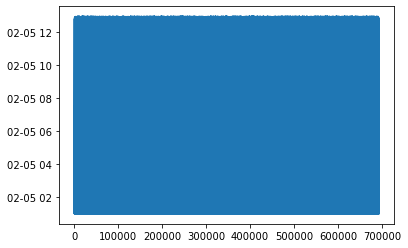

In [64]:
df.time.plot()

In [49]:
df = crashes_df.copy()

df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [52]:
crashes_df['CRASH_DATE'].map(lambda x: dt.datetime.strftime(x, '%m/%d/%Y %H:%M:%S %p'))

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

In [ ]:
crashes_dfdf['CRASH_DATE']

In [78]:
#check unique values
crashes_df['NOT_RIGHT_OF_WAY_I'].value_counts()

Y    29573
N     2912
Name: NOT_RIGHT_OF_WAY_I, dtype: int64